# Aula 5 - Teste de hipóteses

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
https://sites.icmc.usp.br/francisco <br>
Copyright: Creative Commons

<hr>

Vamos resolver alguns exemplos usando simulação de Monte Carlo. Esses exemplos foram discutidos na aula.

### Exemplo 1: Usando simulações

Uma fábrica anuncia que o índice de nicotina dos cigarros de uma dada marca é igual a 20 mg por cigarro. Um laboratório realiza 20 análises do índice obtendo: 22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21. Sabe-se que o índice de nicotina dos cigarros dessa marca se distribui normalmente com variância 4 mg$^2$. Pode-se aceitar a afirmação do fabricante, ao nível de 5%?

$H_0: \mu = 20$<br>
$H_1: \mu > 20$

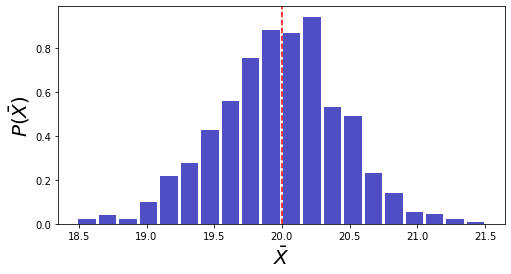

In [70]:
import numpy as np
import matplotlib.pyplot as plt

mu = 20 # hipotese a ser testada
sigma = 2 # desvio padrao populacional
n = 20 #tamanho da amostra
Ns = 1000 # numero de simulacoes
Xm=[] #distribuicao da media amostral
for s in range(1,Ns):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, 
             label = str(Ns), density=True)
plt.axvline(x=mu, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)  

Depois de gerar as amostras, vamos verificar a fração de observações que permitem que aceitemos $H_0$.

In [71]:
X = [22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21]
xobs = np.mean(X)

alpha = 95
xc = np.percentile(Xm, alpha)
print('Xc=',xc,'  Xobs = ', xobs)
if(xobs < xc):
    print("Aceitamos H0")
else:
    print("Rejeitamos H0")

Xc= 20.682130613144107   Xobs =  20.45
Aceitamos H0


Podemos ainda ver esse resultado na figura.

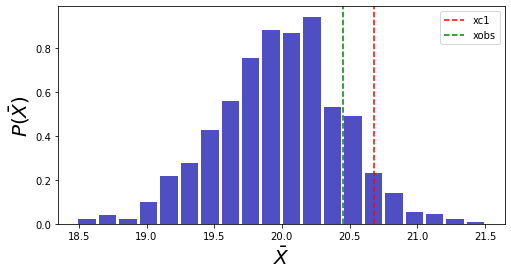

In [72]:
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, density=True)
plt.axvline(x=xc, color='red', linestyle='--', label = 'xc1')
plt.axvline(x=xobs, color='green', linestyle='--', label = 'xobs')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.legend()
plt.show(True) 

### Exemplo 2: Usando simulações

Um pesquisador deseja estudar o efeito de certa substância no tempo de reação de seres vivos a um certo tipo de estímulo. Um experimento é desenvolvido com cobaias, que são inoculadas com a substância e submetidas a um estímulo elétrico, com seus tempos de reação (em segundos) anotados. Os seguintes valores foram obtidos:<br>
T = [9,1;9,3;7,2;13,3;10,9;7,2;9,9;8,0;8,6;7,5]<br>
Admite-se que, em geral,  o tempo de reação tem distribuição Normal com média 8 segundos e desvio padrão 2 segundos. Entretanto, o pesquisador desconfia que o tempo médio sofre alteração por influência da substância. Verifique a nível 6% se o tempo de reação das cobaias submetidas à substância foi alterado.

$H_0: \mu = 8$<br>
$H_1: \mu \neq 8$

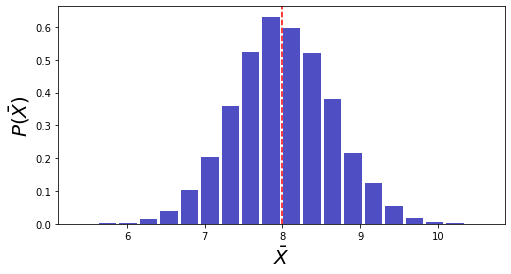

In [73]:
import numpy as np
import matplotlib.pyplot as plt

mu = 8
sigma = 2
n = 10
Ns = 10000
Xm=[] #distribuicao da media amostral
for s in range(1,Ns):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, 
             label = str(Ns), density=True)
plt.axvline(x=mu, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)  

In [74]:
X = [9.1,9.3,7.2,13.3,10.9,7.2,9.9,8.0,8.6,7.5]
xobs = np.mean(X)

alpha = 3 # ao nível 6%
xc1 = np.percentile(Xm, alpha)
xc2 = np.percentile(Xm, 100-alpha)
print('Xc1=',xc1, '  Xc2=', xc2, '  Xobs = ', xobs)
if(xobs < xc1 or xobs > xc2):
    print("Rejeitamos H0")
else:
    print("Aceitamos H0")

Xc1= 6.839844741968931   Xc2= 9.190933108643828   Xobs =  9.1
Aceitamos H0


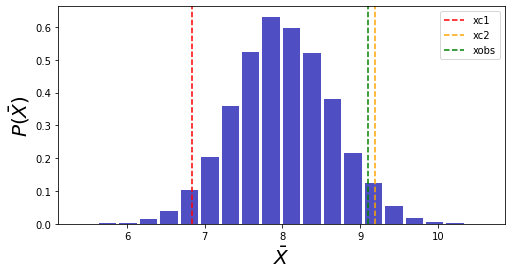

In [75]:
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, density=True)
plt.axvline(x=xc1, color='red', linestyle='--', label = 'xc1')
plt.axvline(x=xc2, color='orange', linestyle='--', label = 'xc2')
plt.axvline(x=xobs, color='green', linestyle='--', label = 'xobs')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.legend()
plt.show(True) 

### Exemplo 3: Solução exata

Em uma cidade,  acredita-se que 60\% das pessoas aprovam o atual prefeito.  Uma pesquisa foi realizada com 200 indivíduos, onde verificou-se que 104 disseram que aprovam o atual governo.  Faça um teste ao nível 5\% para determinar se a aprovação do prefeito é realmente igual a 60\%.

$$
\begin{aligned}
&H_0: p = 0,6\\
&H_1: p < 0,6.
\end{aligned}
$$

In [76]:
import scipy.stats
alpha = 0.05
z = scipy.stats.norm.ppf(alpha)
print('P(Z < %1.2f) = %1.2f' % (z, alpha))

P(Z < -1.64) = 0.05


O valor crítico:

$$
p_c = z_{\alpha}\sqrt{\frac{p(1-p)}{n}} + p
$$

In [77]:
import numpy as np
p = 0.6
mu = p
s = p*(1-p)
n = 200
pc = z*(np.sqrt(p*(1-p)/200)) + p
print('pc = ', pc)

pc =  0.5430205989421221


In [78]:
pobs = 104/200
print('pobs = ',pobs)

pobs =  0.52


Como $\hat{p}_{\mathrm{obs}} < \hat{p}_c $, rejeitamos $H_0$ ao nível de 5\%. Ou seja,  a fração de pessoas que aprovam o atual prefeito é menor do que 60\%.

In [1]:
from scipy.stats import norm

# Dados da pesquisa
p0 = 0.60  # proporção de aprovação do prefeito segundo a crença
p = 104/200  # proporção de aprovação observada na amostra
n = 200  # tamanho da amostra

# Cálculo do escore z
z = (p - p0) / (p0 * (1 - p0) / n)**0.5

# Nível de significância
alpha = 0.05

# Cálculo das áreas críticas
z_alpha_2 = norm.ppf(1 - alpha/2)

# Decisão do teste
if abs(z) > z_alpha_2:
    print("Rejeitamos a hipótese nula. A proporção de aprovação é significativamente diferente de 60%.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que a proporção de aprovação é diferente de 60%.")

# Resultado do escore z e valor-p
p_value = 2 * (1 - norm.cdf(abs(z)))
print(f"Escore z: {z}")
print(f"Valor-p: {p_value}")


Rejeitamos a hipótese nula. A proporção de aprovação é significativamente diferente de 60%.
Escore z: -2.309401076758502
Valor-p: 0.020921335337794167


### Exemplo 4: Solução exata

O número de horas de sono para uma pessoal saudável é próximo de 8 horas. por noite  Pesquisadores suspeitam que um novo medicamento para depressão pode afetar esse número quando pacientes fazem seu uso.   Para verificar essa influência do medicamento no número de horas de sono,  são coletados dados de 10 pacientes, obtendo-se os valores 8,7,7,8,7,8,9,7,7,8, em horas.  Verifique a hipótese dos pesquisadores ao nível 5\%.

$H_0: \mu = 8$<br>
$H_1: \mu \neq 8$

In [79]:
import scipy.stats
alpha = 0.05
n = 10
talpha = scipy.stats.t.ppf(alpha/2, n-1)
print('talpha = ',talpha)

talpha =  -2.262157162740992


In [80]:
X = [8,7,7,8,7,8,9,7,7,8]
s = np.std(X, ddof=1)
xobs = np.mean(X)
print('s = ', s)
print('xobs = ',xobs)

s =  0.6992058987801011
xobs =  7.6


In [81]:
n = len(X)
m = 8
xc1 = m + talpha*s/np.sqrt(n) 
xc2 = m - talpha*s/np.sqrt(n) 
print('xc1 =',xc1)
print('xc2 =',xc2)

xc1 = 7.49981823162488
xc2 = 8.500181768375121


Como xobs está dentro do intervalo $[x_{c1},x_{c2}]$, aceitamos $H_0$ ao nível 5%.

# Valor p

Vamos considerar um exemplo. Sejam as hipóteses:<br>
$H_0: \mu = 10$<br>
$H_1: \mu < 10$<br>
Assumimos que a população tem distribuição uniforme com desvio padrão $\sigma$, definido abaixo.

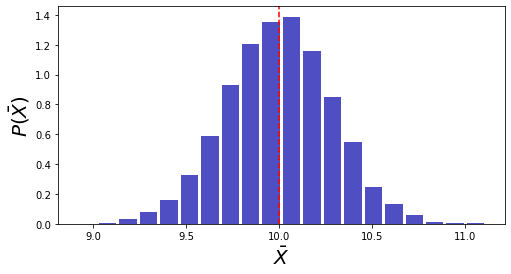

In [82]:
import numpy as np
import matplotlib.pyplot as plt

mu = 10
sigma = 2
n = 50
Ns = 10000
Xm=[] #distribuicao da media amostral
for s in range(1,Ns):
    x = np.random.normal(mu, sigma, n) # sorteia uma amostra de tamanho n
    Xm.append(np.mean(x))
plt.figure(figsize=(8,4))
a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, 
             label = str(Ns), density=True)
plt.axvline(x=mu, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show(True)  


Vamos supor que o valor observado $\bar{x}_{obs}$ é definido abaixo. De acordo com o nível de significância, podemos aceitar ou rejeitar $H_0$, conforme vemos abaixo.

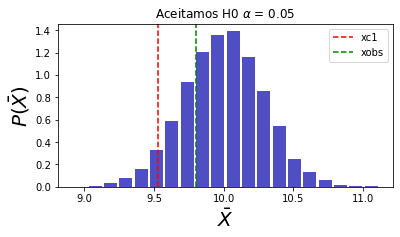

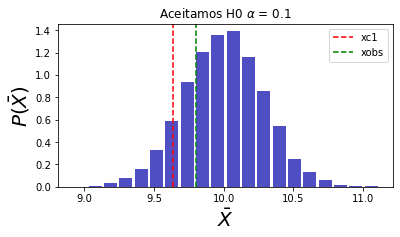

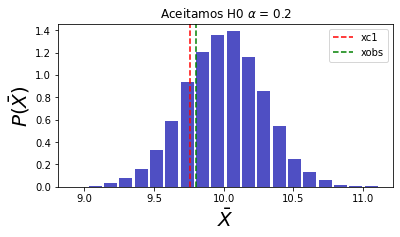

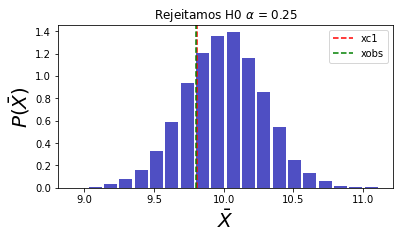

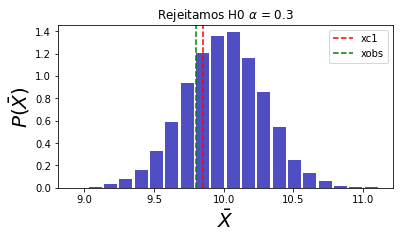

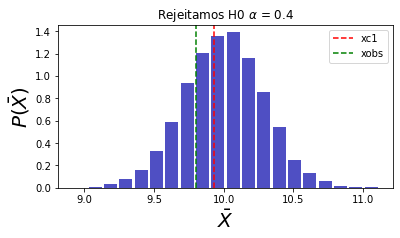

In [83]:
xobs = 9.8
alphas = [5,10,20,25,30,40]
for alpha in alphas:
    xc = np.percentile(Xm, alpha)
    plt.figure(figsize=(6,3))
    a = plt.hist(x=Xm, bins=20, color='#0504aa', alpha=0.7, rwidth=0.85, density=True)
    plt.axvline(x=xc, color='red', linestyle='--', label = 'xc1')
    plt.axvline(x=xobs, color='green', linestyle='--', label = 'xobs')
    plt.xlabel(r'$\bar{X}$', fontsize=20)
    plt.ylabel(r'$P(\bar{X})$', fontsize=20)
    plt.legend()
    if(xobs < xc):
        plt.title("Rejeitamos H0"+r' $\alpha$ = ' + str(alpha/100))
    else:
        plt.title("Aceitamos H0"+r' $\alpha$ = ' + str(alpha/100))
    plt.show(True) 

O valor de $\alpha$ em que há a transição entre aceitar ou rejeitar $H_0$ é o valor p.

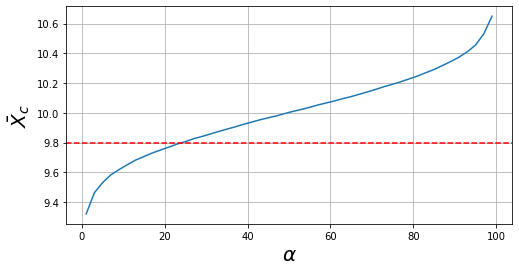

In [84]:
import numpy as np

xobs = 9.8
xcs = []
alphas = []
for alpha in np.arange(1,100,2):
    xc = np.percentile(Xm, alpha)
    xcs.append(xc)
    alphas.append(alpha)
    
plt.figure(figsize=(8,4))
plt.plot(alphas,xcs)
plt.axhline(y=xobs, color='r', linestyle='--', label = 'Media')
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\bar{X}_c$', fontsize=20)

plt.grid(True)
plt.show(True)

Podemos calcular o valor p: $P(\bar{X} > \bar{x}_{obs}|\mu=\mu_0) = \alpha$:

In [85]:
pvalue = 0
for i in range(0, len(Xm)):
    if(Xm[i] < xobs):
        pvalue = pvalue + 1
pvalue = pvalue/len(Xm)
print('P-valor: ', pvalue)

P-valor:  0.24122412241224123


Mostrando no gráfico anterior.

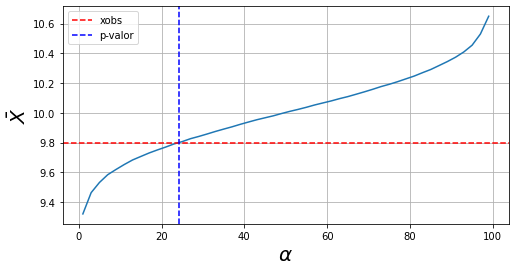

In [86]:
xobs = 9.8
xcs = []
alphas = []
for alpha in np.arange(1,100,2):
    xc = np.percentile(Xm, alpha)
    xcs.append(xc)
    alphas.append(alpha)
    
plt.figure(figsize=(8,4))
plt.plot(alphas,xcs)
plt.axhline(y=xobs, color='red', linestyle='--', label = 'xobs')
plt.axvline(x=pvalue*100, color='blue', linestyle='--', label = 'p-valor')
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel(r'$\bar{X}$', fontsize=20)
plt.legend()
plt.grid(True)
plt.show(True)

**Exemplo:** Estudantes acreditam que a média da turma em um curso de estatística é igual a 65. O professor acredita que a média é maior. Para verificar essas hipóteses, ele seleciona notas de 10 estudantes, obtemos os valores [65, 65, 70, 67, 66, 63, 63, 68, 72, 71].  Assuma que as notas são normalmente distribuídas, calcule o valor p.

In [87]:
import numpy as np
X = [65, 65, 70, 67, 66, 63, 63, 68, 72, 71]
m = 65
n = len(X)
s = np.std(X, ddof=1)
xobs = np.mean(X)
print('s = ', s)
print('xobs = ',xobs)

s =  3.197221015541813
xobs =  67.0


$$
t_{\alpha} = \frac{x_{obs}-\mu}{s/\sqrt{n}}
$$

In [88]:
talpha = (xobs - m)/(s/np.sqrt(n))
print('talpha = ', talpha)

talpha =  1.978141420187361


In [89]:
import scipy.stats

alpha = scipy.stats.t.cdf(talpha, n-1)
print('alpha =',1 - alpha)

alpha = 0.03964824393588806


Logo, o valor p é igual 0,039, indicando uma forte evidência para rejeitarmos $H_0$.

## Comparação de duas médias

Uma das principais aplicações do teste de hipóteses é na seleção de atributos. Vamos comparar duas distribuições e verificar se elas possuem a mesma média. Vamos formular as hipóteses:
$$
H_0: \mu_1 = \mu_2
$$
$$
H_a: \mu_1 \neq \mu_2
$$

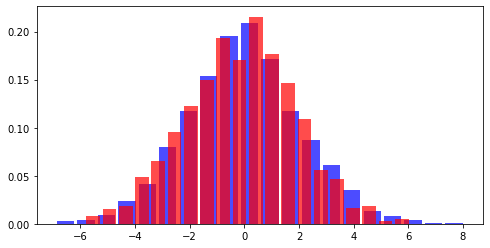

In [90]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
mu1 = 0
sigma1 = 2
x1 = np.random.normal(mu1, sigma1, n) # sorteia uma amostra de tamanho n

mu2 = 0
sigma2 = 2
x2 = np.random.normal(mu2, sigma2, n) # sorteia uma amostra de tamanho n

plt.figure(figsize=(8,4))
a1 = plt.hist(x=x1, bins=20, color='blue', alpha=0.7, rwidth=0.85, density=True)
a2 = plt.hist(x=x2, bins=20, color='red', alpha=0.7, rwidth=0.85, density=True)
plt.show(True)  

Fazendo um teste de hipóteses para comparar as médias das duas distribuições:

In [91]:
from scipy import stats

t_stat, p = stats.ttest_ind(x1,x2)
print(f't={t_stat}, p={p}')

t=1.2607979946933925, p=0.20752884296966367


Ou seja, como o valor p é alto, podemos concluir que as distribuições possuem a mesma média (aceitamos $H_0$)

Vamos agora considerar duas distribuições com médias distintas.

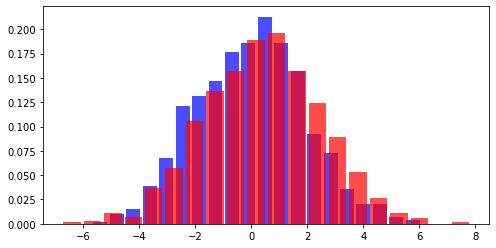

In [100]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
mu1 = 0
sigma1 = 2
x1 = np.random.normal(mu1, sigma1, n) # sorteia uma amostra de tamanho n

mu2 = 0.5
sigma2 = 2
x2 = np.random.normal(mu2, sigma2, n) # sorteia uma amostra de tamanho n

plt.figure(figsize=(8,4))
a1 = plt.hist(x=x1, bins=20, color='blue', alpha=0.7, rwidth=0.85, density=True)
a2 = plt.hist(x=x2, bins=20, color='red', alpha=0.7, rwidth=0.85, density=True)
plt.show(True)  

In [101]:
from scipy import stats

t_stat, p = stats.ttest_ind(x1,x2)
print(f't={t_stat}, p={p}')

t=-4.871868681827615, p=1.19246724185128e-06


Nesse segundo caso, vemos que o valor p é próximo de zero, o que nos permite rejeitar $H_0$

Portanto, podemos usar o teste de hipóteses para realizar uma seleção de atributos, onde atributos que não conseguem discriminar duas classes, devem ser removidos do conjunto de dados.

## Seleção de atributos

Vamos incialmente gerar um conjunto de dados, onde as duas primeiras colunas possuem a mesma média para duas classes, mas as outras duas permite separar as classes.

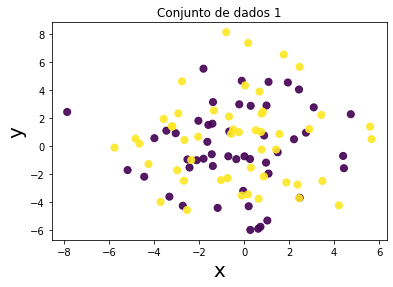

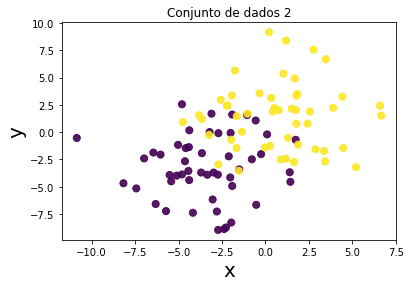

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# duas primeiras variaveis
centers = [(0, 0), (0, 0)]
data = make_blobs(n_samples=100, centers=centers, cluster_std=3, 
                  shuffle=False, random_state=42)
X1 = data[0] # atributos das observacoes
y = data[1] # classe conhecida inicialmente
# mostra os dados
plt.scatter(X1[:,0], X1[:,1], c=y, cmap='viridis', s=50, alpha=0.9)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Conjunto de dados 1')
plt.show(True)

# terceira e quarta variaveis
centers = [(-3, -3), (1,1)]
data = make_blobs(n_samples=100, centers=centers, cluster_std=3, 
                  shuffle=False, random_state=42)
X2 = data[0] # atributos das observacoes
y = data[1] # classe conhecida inicialmente
# mostra os dados
plt.scatter(X2[:,0], X2[:,1], c=y, cmap='viridis', s=50, alpha=0.9)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.title('Conjunto de dados 2')
plt.show(True)

Note quem as duas últimas variáveis permitem separar os dados tanto nos eixos x quando y.

Vamos construir um conjunto único com os dados gerados.

In [103]:
X = np.column_stack((X1,X2))

Vamos fazer a classificação usando todo o conjunto de dados.

In [105]:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.9


Para realizar a seleção dos atributos, usammos Anova (https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia), que usa o teste de hipóteses.

In [107]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


fvalue_selector = SelectKBest(f_classif, k=2) 
#seleciona os dois atributos mais importantes usando teste de hipoteses

X_kbest = fvalue_selector.fit_transform(X, y)

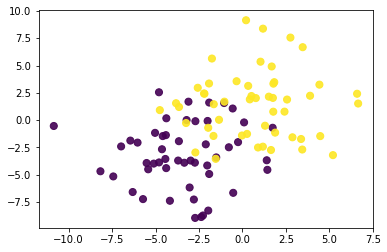

In [108]:
plt.scatter(X_kbest[:,0], X_kbest[:,1], c=y, cmap='viridis', s=50, alpha=0.9)
plt.show(True)

Notamos que quando selecionamos os dois principais atributos, o métod escolhe os atributos 3 e 4, conforme o esperado (veja o gráfico anterior).

Realizando a classificação usando apenas os atributos selecionados:

In [109]:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X_kbest, y, test_size = p, 
                                                    random_state = 42)

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy: ', model.score(x_test, y_test))

Accuracy:  0.9


Logo, vemos que mesmo usando dois atributos, mantemos a taxa de acertos. Portanto, a seleção de atributos permitiu um modelo mais simples (com menos atributos), mas com o mesmo desempenho.